In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
file_path = "data/voice.csv"  
data = pd.read_csv(file_path)

data['label'] = data['label'].map({'male': 1, 'female': 0})

X = data.drop(columns=['label']).values  
y = data['label'].values  

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_safe(z):
    return np.clip(sigmoid(z), 1e-7, 1 - 1e-7)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

def binary_cross_entropy_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + 1e-8)

In [5]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0) * 0.01
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1) * 0.01
    b2 = np.zeros((n2, 1))
    parameter = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameter

In [6]:
def forward_propagation(X, parameter):
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid_safe(Z2)
    activations = {'A1': A1, 'A2': A2}
    return activations

In [7]:
def back_propragation(X, y, parameter, activations):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameter['W2']
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {'db1': db1, 'db2': db2, 'dW1': dW1, 'dW2': dW2}
    return gradients

In [8]:
def update(gradients, parameter, learning_rate):
    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    parameter = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
    return parameter

In [9]:
def predict(X, parameter):
    activations = forward_propagation(X, parameter)
    A2 = activations['A2']
    return (A2 >= 0.5).astype(int)

In [10]:
def neural_network(X, y, n1=16, learning_rate=0.1, n_iter=1000):
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)
    train_loss = []
    train_acc = []
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        gradients = back_propragation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    return parametres

In [11]:
X = X_train.T
y = y_train.reshape((1, y_train.shape[0]))

100%|██████████| 1000/1000 [00:12<00:00, 76.97it/s]


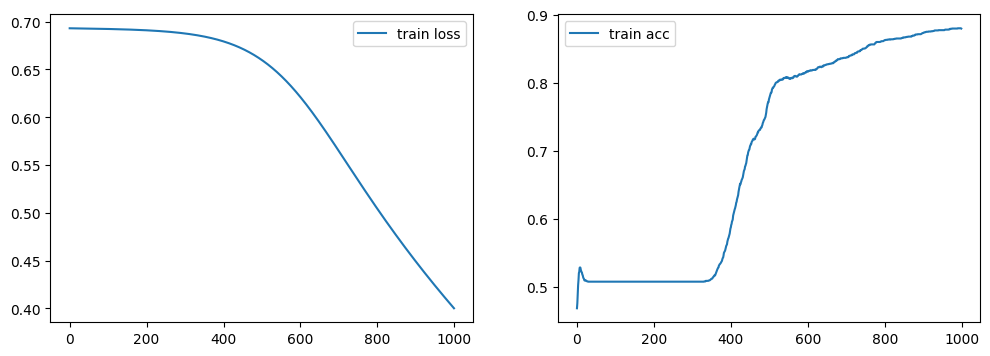

{'W1': array([[ 1.12851147e-01, -2.15764626e-01,  4.68369487e-02,
          2.48015286e-01, -9.19987507e-02, -3.27586755e-01,
          1.68597155e-02, -2.52794942e-02, -1.79418273e-01,
         -9.31584515e-02,  6.87423829e-03,  1.09753358e-01,
          2.81516530e-01,  2.87855271e-03,  8.09060943e-03,
          3.41451028e-02,  8.94052447e-02,  2.15198944e-02,
          2.53810664e-02,  1.34277520e-02],
        [-2.73224356e-02,  1.08786125e-02,  5.27299688e-03,
         -1.56263289e-02,  3.04970431e-02, -9.14386534e-04,
          6.97604683e-05, -2.36419318e-04,  2.34746047e-02,
          1.56859468e-02,  1.88674359e-03,  1.98908771e-03,
         -4.26570500e-02, -1.91167151e-02, -9.67279036e-03,
          2.03191078e-03,  9.02757669e-03,  1.36651723e-02,
         -2.17294184e-03, -7.14479384e-03],
        [ 1.88016030e-02, -7.34281827e-02, -9.81621470e-04,
          8.02979430e-02, -2.93007346e-02, -8.69340981e-02,
         -1.21560077e-02,  6.85504978e-05, -6.57563909e-02,
      

In [12]:
neural_network(X, y, n1=16, learning_rate=0.01, n_iter = 1000)

100%|██████████| 1000/1000 [00:09<00:00, 100.42it/s]


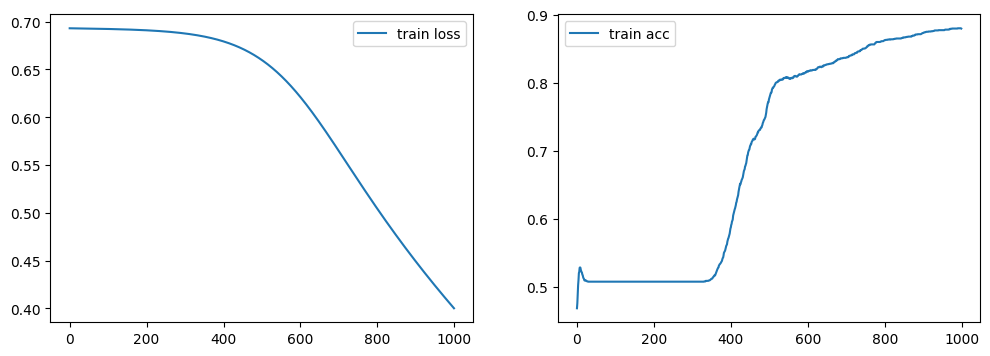

In [13]:
parametres_final = neural_network(X, y, n1=16, learning_rate=0.01, n_iter = 1000)

Accuracy: 0.6278
Precision: 0.6247
Recall: 0.7507
F1 Score: 0.6819


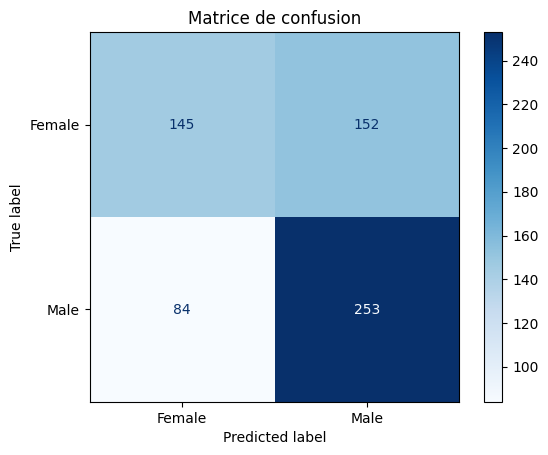

In [14]:
X_test = X_test.T
y_test = y_test.reshape((1, y_test.shape[0]))
y_test = y_test.flatten()

y_test_pred = predict(X_test, parametres_final)  

accuracy = accuracy_score(y_test, y_test_pred.flatten())
precision = precision_score(y_test, y_test_pred.flatten())
recall = recall_score(y_test, y_test_pred.flatten())
f1 = f1_score(y_test, y_test_pred.flatten())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_test_pred.flatten())

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])
cm_display.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()